In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import operator
import math
import warnings
import openpyxl
import random
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import tensorflow as tf
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import pandas as pd

# 한글 글꼴체 변경
plt.rcParams['font.family'] ='Malgun Gothic'
# df.head() 이런거 했을 때, 컬럼이 생략되지 않고, 모든 컬럼 뜨게
pd.set_option('display.max_columns', None)
# 지수 표기법 대신에 소수점으로 표시하는코드
pd.options.display.float_format = '{:.2f}'.format
# 값 길이 제한 X
pd.set_option('display.max_colwidth', None) # 값 길이 제한 없음

In [2]:
os.chdir("C:\workspaces\LGHV_Project\src")

01_16_LGHV_Modeling_afterFE2.ipynb 에서의 모델링을 통해 나온 상위 7개 Features로 모델링 진행

#### ✅ 3차 선정된 Features

| Feature |
|---------|
| `TOTAL_USED_DAYS` |
| `CH_LAST_DAYS_BF_GRP` |
| `TV_I_CNT` |
| `AGE_GRP10` |
| `VOC_STOP_CANCEL_MONTH1_YN` |
| `CH_HH_AVG_MONTH1` |
| `MONTHS_REMAINING` |

해당 Feature들을 가지고 **모델링을 한 번 더 진행!!**


---

In [3]:
df_real = pd.read_csv("data/full_data/TPS_cancel_data_FeatureEngineering_end.csv")

In [4]:
# 해당 컬럼들 들고오기

df = df_real.filter(items=['sha2_hash','TOTAL_USED_DAYS','TV_I_CNT','CH_LAST_DAYS_BF_GRP',
                          'VOC_STOP_CANCEL_MONTH1_YN','AGE_GRP10',
                          'CH_HH_AVG_MONTH1','MONTHS_REMAINING','p_mt','churn'])

In [5]:
df.columns

Index(['sha2_hash', 'TOTAL_USED_DAYS', 'TV_I_CNT', 'CH_LAST_DAYS_BF_GRP',
       'VOC_STOP_CANCEL_MONTH1_YN', 'AGE_GRP10', 'CH_HH_AVG_MONTH1',
       'MONTHS_REMAINING', 'p_mt', 'churn'],
      dtype='object')

---

### 랜덤 언더 샘플링 데이터로 진행
1. 로지스틱
2. 랜덤 포레스트
3. XGB
4. LGBM
5. Cat

#### 1. LR 랜덤 언더 샘플링 데이터

In [6]:
# 2월 ~ 9월 train
# 11월 test
train = df[df['p_mt'].isin([2,3,4,5,6,7,8,9])]
test = df[df['p_mt'] == 11]

In [7]:
display(train, test)

,sha2_hash,TOTAL_USED_DAYS,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,CH_HH_AVG_MONTH1,MONTHS_REMAINING,p_mt,churn
0,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,733,3.00,3개월내없음,N,60대,0.00,13,2,N
1,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,764,3.00,일주일내,N,60대,6.72,12,3,N
2,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,794,3.00,3주일전,N,60대,9.86,11,4,N
3,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,825,3.00,4주일전,N,60대,5.95,10,5,N
4,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,855,3.00,일주일내,N,60대,4.03,9,6,N
...,...,...,...,...,...,...,...,...,...,...
21483371,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,2246,1.00,일주일내,N,50대,3.67,-37,5,N
21483372,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,2276,1.00,일주일내,N,50대,3.14,-38,6,N
21483373,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,2307,1.00,일주일내,N,50대,4.10,-39,7,N
21483374,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,2338,1.00,일주일내,N,50대,2.03,-40,8,N


,sha2_hash,TOTAL_USED_DAYS,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,CH_HH_AVG_MONTH1,MONTHS_REMAINING,p_mt,churn
9,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,1008,3.00,일주일내,N,60대,6.23,33,11,N
20,000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34,4402,2.00,일주일내,N,50대,15.37,7,11,N
31,0000161608bc85042f2a7b2d51524e01e44da09a2c92ed7136f09c3b90414858,2641,6.00,일주일내,N,60대,1.47,20,11,N
42,00001c363e8c833646a913c7566acd329523316f6a03afc0fe77dac7ca828d17,1989,3.00,일주일내,N,60대,2.16,-10,11,N
53,00001f885d4d6c5ff6d01d5ebf1d6093d7f53c130de5fa3652dc0424d165b21c,3979,4.00,일주일내,N,50대,1.64,-51,11,N
...,...,...,...,...,...,...,...,...,...,...
21483333,ffffdac172fec24c59aea00b7c6e53b8f9631e323cb99ada41a5fc7c38eaa74c,3599,2.00,3개월내없음,N,50대,0.00,-48,11,N
21483344,ffffe2ae4b1bafe83133c187e7628932d4915bc7ee92457ac4b1b61e5362c3ba,2281,3.00,일주일내,N,40대,1.81,-39,11,N
21483355,ffffe9bc336450ed573a845cea2376c7dc913ba9d775e3223931ed33ba2f08f0,3958,2.00,일주일내,N,30대,1.69,-109,11,N
21483366,ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df,1552,2.00,일주일내,N,50대,3.39,19,11,N


In [8]:
display(train['churn'].value_counts(normalize=True) * 100)
display(train['churn'].value_counts())

churn
N   99.32
Y    0.68
Name: proportion, dtype: float64

churn
N    15541330
Y      105706
Name: count, dtype: int64

랜덤 언더 샘플링

In [9]:
train = train.drop(columns = ['sha2_hash','p_mt'])

In [10]:
# 랜덤 시드 42로 설정하고 랜덤 언더 샘플링 진행
from imblearn.under_sampling import RandomUnderSampler

X = train.drop(columns = ['churn'])
y = train['churn']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [11]:
# 원본 데이터 churn 분포!
print("랜덤 언더 샘플링 전:")
print(y.value_counts())

# 랜덤 언더 샘플링 후, churn 분포!
print("\n랜덤 언더 샘플링 후:")
print(pd.Series(y_resampled).value_counts())

랜덤 언더 샘플링 전:
churn
N    15541330
Y      105706
Name: count, dtype: int64

랜덤 언더 샘플링 후:
churn
N    105706
Y    105706
Name: count, dtype: int64


In [12]:
# y_resampled의 이름을 churn으로 명확하게 설정
y_resampled = pd.Series(y_resampled, name='churn')

# 그리고 X_resampled와 y_resampled 병합
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

In [13]:
display(resampled_data)

,TOTAL_USED_DAYS,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,CH_HH_AVG_MONTH1,MONTHS_REMAINING,churn
9584974,2812,3.00,일주일내,N,60대,5.89,17,N
21276676,2326,2.00,일주일내,N,30대,10.47,-40,N
3206023,3076,2.00,일주일내,N,60대,10.28,28,N
12989342,3807,2.00,일주일내,N,50대,2.09,20,N
17489377,3927,3.00,3주일전,N,90대이상,0.33,19,N
...,...,...,...,...,...,...,...,...
21482271,3712,2.00,일주일내,N,60대,1.90,30,Y
21482420,501,2.00,3개월내없음,N,30대,0.00,20,Y
21482906,11,2.00,일주일내,N,50대,3.49,36,Y
21483095,231,1.00,일주일전,N,50대,0.62,29,Y


In [14]:
train = resampled_data

로지스틱 회귀 진행

In [15]:
display(train)
display(test)

,TOTAL_USED_DAYS,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,CH_HH_AVG_MONTH1,MONTHS_REMAINING,churn
9584974,2812,3.00,일주일내,N,60대,5.89,17,N
21276676,2326,2.00,일주일내,N,30대,10.47,-40,N
3206023,3076,2.00,일주일내,N,60대,10.28,28,N
12989342,3807,2.00,일주일내,N,50대,2.09,20,N
17489377,3927,3.00,3주일전,N,90대이상,0.33,19,N
...,...,...,...,...,...,...,...,...
21482271,3712,2.00,일주일내,N,60대,1.90,30,Y
21482420,501,2.00,3개월내없음,N,30대,0.00,20,Y
21482906,11,2.00,일주일내,N,50대,3.49,36,Y
21483095,231,1.00,일주일전,N,50대,0.62,29,Y


,sha2_hash,TOTAL_USED_DAYS,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,CH_HH_AVG_MONTH1,MONTHS_REMAINING,p_mt,churn
9,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,1008,3.00,일주일내,N,60대,6.23,33,11,N
20,000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34,4402,2.00,일주일내,N,50대,15.37,7,11,N
31,0000161608bc85042f2a7b2d51524e01e44da09a2c92ed7136f09c3b90414858,2641,6.00,일주일내,N,60대,1.47,20,11,N
42,00001c363e8c833646a913c7566acd329523316f6a03afc0fe77dac7ca828d17,1989,3.00,일주일내,N,60대,2.16,-10,11,N
53,00001f885d4d6c5ff6d01d5ebf1d6093d7f53c130de5fa3652dc0424d165b21c,3979,4.00,일주일내,N,50대,1.64,-51,11,N
...,...,...,...,...,...,...,...,...,...,...
21483333,ffffdac172fec24c59aea00b7c6e53b8f9631e323cb99ada41a5fc7c38eaa74c,3599,2.00,3개월내없음,N,50대,0.00,-48,11,N
21483344,ffffe2ae4b1bafe83133c187e7628932d4915bc7ee92457ac4b1b61e5362c3ba,2281,3.00,일주일내,N,40대,1.81,-39,11,N
21483355,ffffe9bc336450ed573a845cea2376c7dc913ba9d775e3223931ed33ba2f08f0,3958,2.00,일주일내,N,30대,1.69,-109,11,N
21483366,ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df,1552,2.00,일주일내,N,50대,3.39,19,11,N


In [17]:
test = test.drop(columns=['sha2_hash','p_mt'])

In [19]:
from sklearn.preprocessing import LabelEncoder

train_and_test = pd.concat([train, test])

categorical_cols = train_and_test.select_dtypes(include=['object']).columns

label_encoders = {}

for col in categorical_cols:
  le = LabelEncoder()
  train_and_test[col] = le.fit_transform(train_and_test[col])
  label_encoders[col] = le

# 인코딩 후, 다시 train과 test로 분리

train = train_and_test.iloc[:len(train)].reset_index(drop=True)
test = train_and_test.iloc[len(train):].reset_index(drop=True)

print("레이블 인코딩 끝! 😁")

레이블 인코딩 끝! 😁


In [20]:
for col, le in label_encoders.items():
    print(f"🔹 {col} 레이블 인코딩 매핑")
    label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(label_mapping)
    print("-" * 30)

🔹 CH_LAST_DAYS_BF_GRP 레이블 인코딩 매핑
{'2주일전': 0, '3개월내없음': 1, '3주일전': 2, '4주일전': 3, '일주일내': 4, '일주일전': 5}
------------------------------
🔹 VOC_STOP_CANCEL_MONTH1_YN 레이블 인코딩 매핑
{'N': 0, 'Y': 1}
------------------------------
🔹 AGE_GRP10 레이블 인코딩 매핑
{'10대': 0, '20대': 1, '30대': 2, '40대': 3, '50대': 4, '60대': 5, '70대': 6, '80대': 7, '90대이상': 8, '연령없음': 9}
------------------------------
🔹 churn 레이블 인코딩 매핑
{'N': 0, 'Y': 1}
------------------------------


In [21]:
display(train)
display(test)

,TOTAL_USED_DAYS,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,CH_HH_AVG_MONTH1,MONTHS_REMAINING,churn
0,2812,3.00,4,0,5,5.89,17,0
1,2326,2.00,4,0,2,10.47,-40,0
2,3076,2.00,4,0,5,10.28,28,0
3,3807,2.00,4,0,4,2.09,20,0
4,3927,3.00,2,0,8,0.33,19,0
...,...,...,...,...,...,...,...,...
211407,3712,2.00,4,0,5,1.90,30,1
211408,501,2.00,1,0,2,0.00,20,1
211409,11,2.00,4,0,4,3.49,36,1
211410,231,1.00,5,0,4,0.62,29,1


,TOTAL_USED_DAYS,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,CH_HH_AVG_MONTH1,MONTHS_REMAINING,churn
0,1008,3.00,4,0,5,6.23,33,0
1,4402,2.00,4,0,4,15.37,7,0
2,2641,6.00,4,0,5,1.47,20,0
3,1989,3.00,4,0,5,2.16,-10,0
4,3979,4.00,4,0,4,1.64,-51,0
...,...,...,...,...,...,...,...,...
1945587,3599,2.00,1,0,4,0.00,-48,0
1945588,2281,3.00,4,0,3,1.81,-39,0
1945589,3958,2.00,4,0,2,1.69,-109,0
1945590,1552,2.00,4,0,4,3.39,19,0


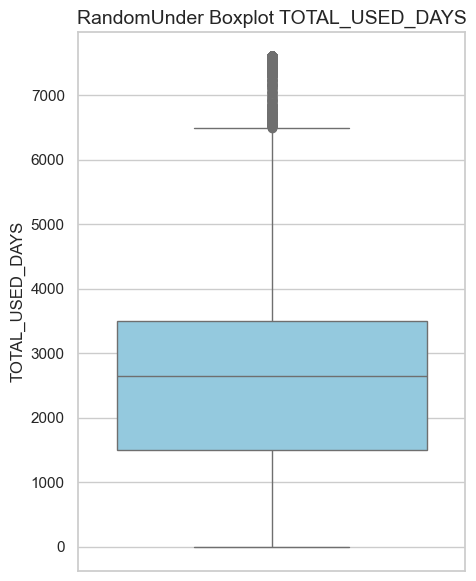

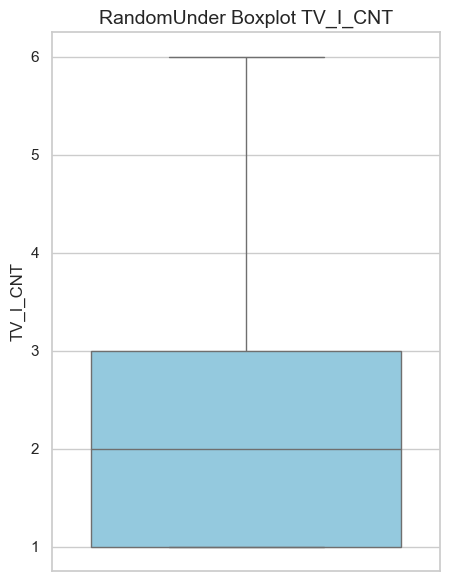

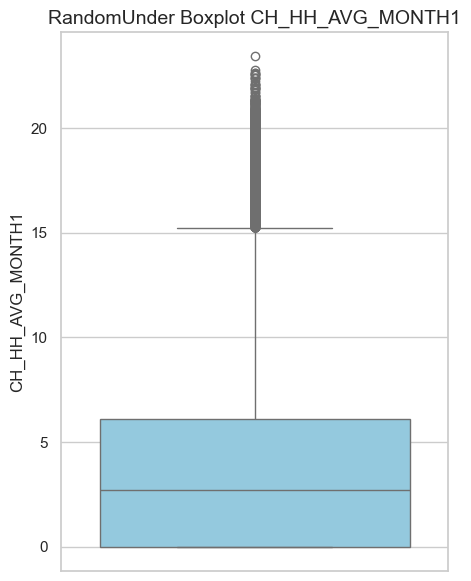

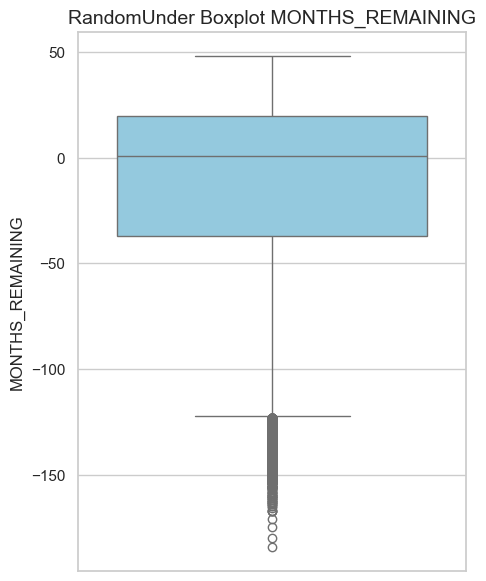

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# df에서 연속형(수치형) 변수 찾기
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

sns.set(style="whitegrid")

# 각 연속형 변수에 대해 boxplot
for col in numeric_columns:
    plt.figure(figsize=(5, 7))
    sns.boxplot(y=train[col], color="skyblue")

    plt.ylabel(col, fontsize=12)
    plt.title(f'RandomUnder Boxplot {col}', fontsize=14)

    plt.show()

In [23]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# boxplot으로 확인한 robust 스케일링 컬럼들
robust_columns = ['TOTAL_USED_DAYS', 'CH_HH_AVG_MONTH1', 'MONTHS_REMAINING']  # RobustScaler를 적용할 컬럼
minmax_columns = [col for col in train.columns if col not in robust_columns + ['churn']]  # 나머지 컬럼

# 스케일러 생성
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# RobustScaler 적용
train[robust_columns] = robust_scaler.fit_transform(train[robust_columns])
test[robust_columns] = robust_scaler.transform(test[robust_columns])

# MinMaxScaler 적용
train[minmax_columns] = minmax_scaler.fit_transform(train[minmax_columns])
test[minmax_columns] = minmax_scaler.transform(test[minmax_columns])

# 결과 확인
print("robust, minmax 끝")

robust, minmax 끝


In [24]:
display(train, test)

,TOTAL_USED_DAYS,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,CH_HH_AVG_MONTH1,MONTHS_REMAINING,churn
0,0.09,0.40,0.80,0.00,0.50,0.52,0.28,0
1,-0.16,0.20,0.80,0.00,0.12,1.27,-0.72,0
2,0.22,0.20,0.80,0.00,0.50,1.24,0.47,0
3,0.58,0.20,0.80,0.00,0.38,-0.10,0.33,0
4,0.64,0.40,0.40,0.00,0.88,-0.39,0.32,0
...,...,...,...,...,...,...,...,...
211407,0.54,0.20,0.80,0.00,0.50,-0.13,0.51,1
211408,-1.07,0.20,0.20,0.00,0.12,-0.44,0.33,1
211409,-1.32,0.20,0.80,0.00,0.38,0.13,0.61,1
211410,-1.21,0.00,1.00,0.00,0.38,-0.34,0.49,1


,TOTAL_USED_DAYS,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,CH_HH_AVG_MONTH1,MONTHS_REMAINING,churn
0,-0.82,0.40,0.80,0.00,0.50,0.58,0.56,0
1,0.88,0.20,0.80,0.00,0.38,2.08,0.11,0
2,-0.00,1.00,0.80,0.00,0.50,-0.20,0.33,0
3,-0.33,0.40,0.80,0.00,0.50,-0.09,-0.19,0
4,0.67,0.60,0.80,0.00,0.38,-0.18,-0.91,0
...,...,...,...,...,...,...,...,...
1945587,0.48,0.20,0.20,0.00,0.38,-0.44,-0.86,0
1945588,-0.18,0.40,0.80,0.00,0.25,-0.15,-0.70,0
1945589,0.66,0.20,0.80,0.00,0.12,-0.17,-1.93,0
1945590,-0.55,0.20,0.80,0.00,0.38,0.11,0.32,0


In [25]:
# 로지스틱 회귀 모델 진행

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train = train.drop(columns=['churn'])
y_train = train['churn']

# 로지스틱 회귀 모델 생성
#
model = LogisticRegression(solver='liblinear', random_state=42)

# 모델 학습
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

Test Accuracy: 0.79

Classification Report (테스트 데이터):
              precision    recall  f1-score   support

           0       1.00      0.79      0.88   1932416
           1       0.02      0.65      0.04     13176

    accuracy                           0.79   1945592
   macro avg       0.51      0.72      0.46   1945592
weighted avg       0.99      0.79      0.88   1945592


Confusion Matrix (테스트 데이터):
[[1527801  404615]
 [   4578    8598]]


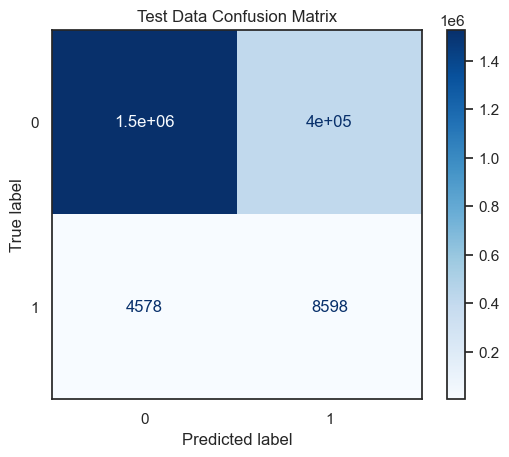

Test AUC-ROC: 0.79


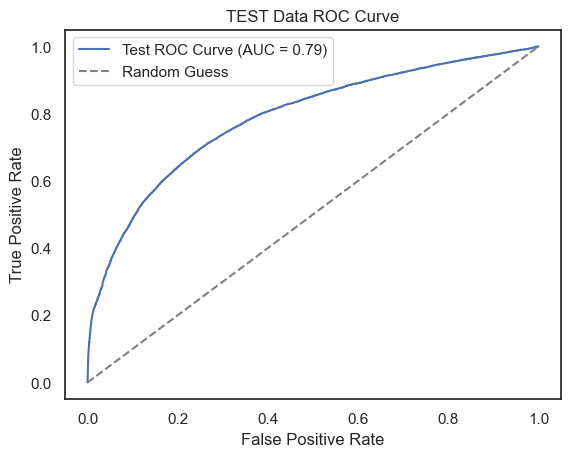

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# 테스트 데이터 불러오기
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 테스트 데이터 (Test) 평가
# -----------------------------------------------------------
# 테스트 데이터(test) 예측
test_predictions = model.predict(X_test)

# 정확도 확인
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification 리포트
print("\nClassification Report (테스트 데이터):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (혼동행렬)
print("\nConfusion Matrix (테스트 데이터):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC 계산
test_probabilities = model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

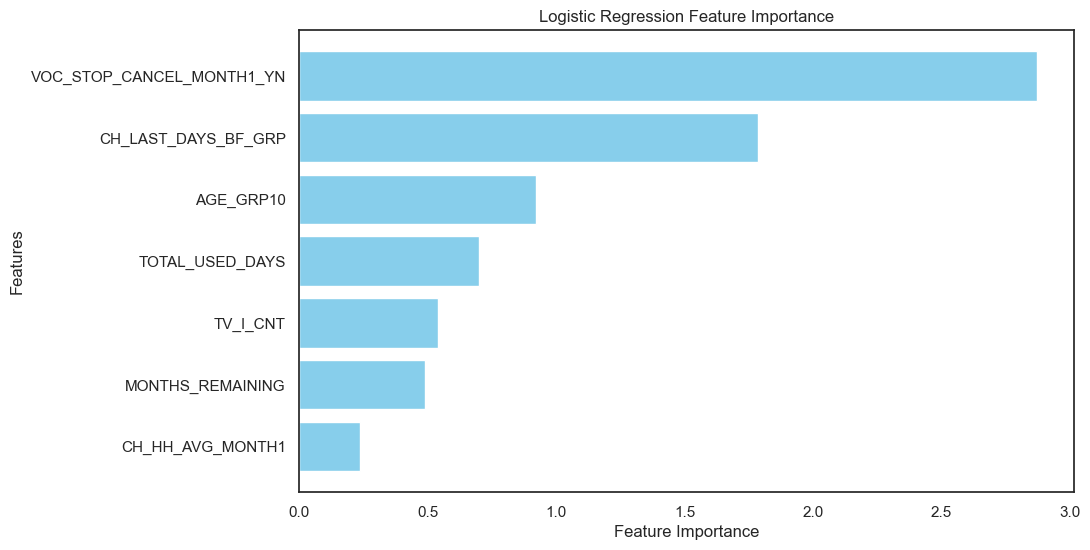

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Feature Importance 추출 (절댓값 사용)
feature_importance = np.abs(model.coef_[0])

# DataFrame 변환 및 정렬
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

#### 2. 랜덤 포레스트 랜덤 언더 샘플링

In [28]:
X_train = train.drop(columns=['churn'])  # 독립 변수
y_train = train['churn']  # 종속 변수

# 랜덤 포레스트 모델
rf_model = RandomForestClassifier(
    n_estimators=100,  # 트리 개수
    random_state=42
)

# 모델 학습
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Test Accuracy: 0.77

Classification Report (테스트 데이터):
              precision    recall  f1-score   support

           0       1.00      0.77      0.87   1932416
           1       0.02      0.66      0.04     13176

    accuracy                           0.77   1945592
   macro avg       0.51      0.72      0.45   1945592
weighted avg       0.99      0.77      0.87   1945592


Confusion Matrix (테스트 데이터):
[[1496186  436230]
 [   4418    8758]]


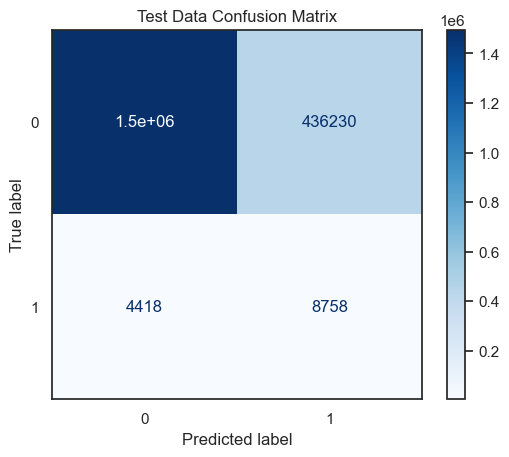

Test AUC-ROC: 0.79


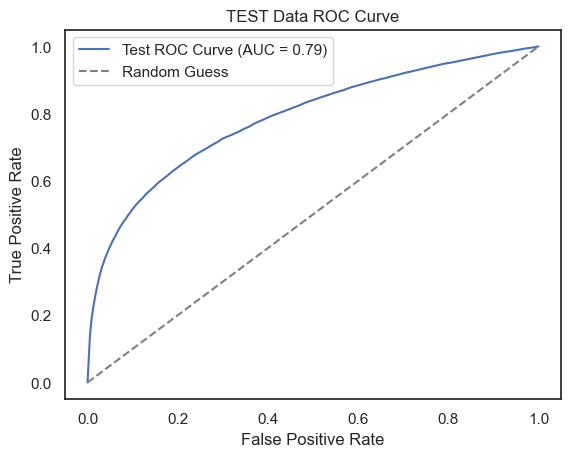

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# 테스트 데이터 불러오기
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 테스트 데이터 (Test) 평가
# -----------------------------------------------------------
# 테스트 데이터(test) 예측
test_predictions = rf_model.predict(X_test)

# 정확도 확인
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification 리포트
print("\nClassification Report (테스트 데이터):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (혼동행렬)
print("\nConfusion Matrix (테스트 데이터):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=rf_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC 계산
test_probabilities = rf_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

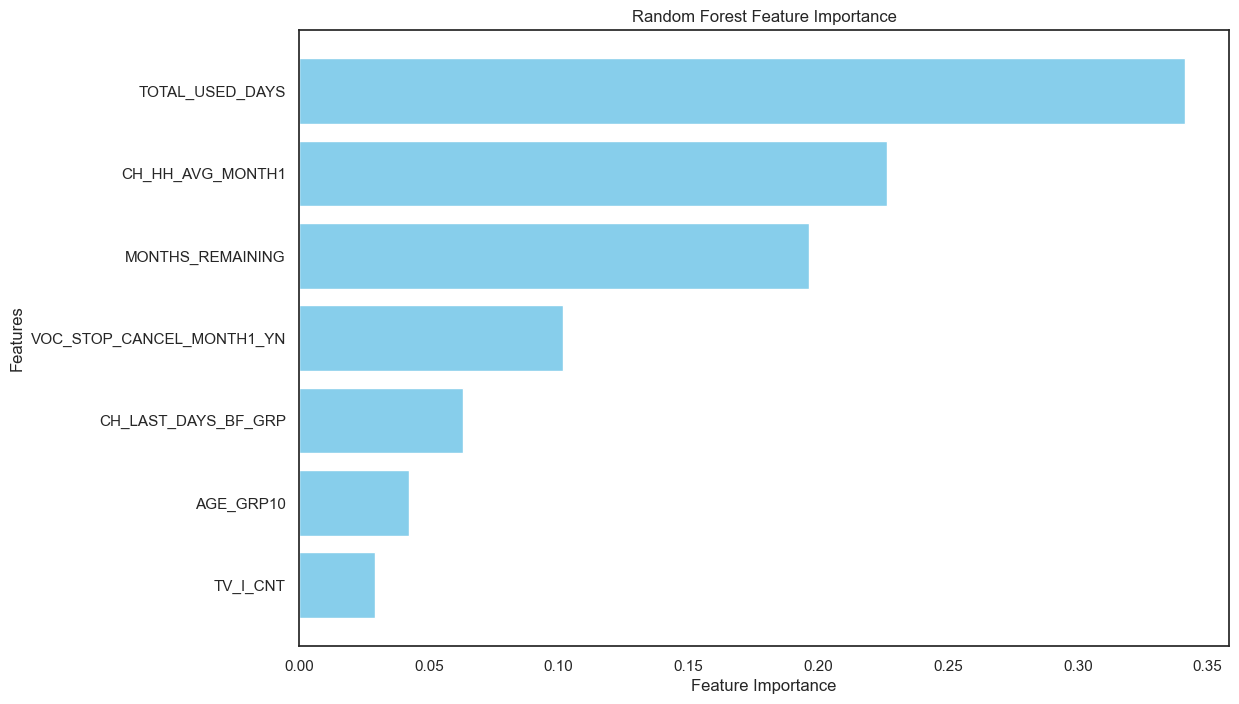

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

#### 3. XGB 랜덤 언더 샘플링

In [31]:
from xgboost import XGBClassifier

X_train = train.drop(columns=['churn'])
y_train = train['churn']

# XGBoost 모델 생성
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

# 모델 학습
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Test Accuracy: 0.81

Classification Report (테스트 데이터):
              precision    recall  f1-score   support

           0       1.00      0.81      0.90   1932416
           1       0.03      0.71      0.05     13176

    accuracy                           0.81   1945592
   macro avg       0.51      0.76      0.47   1945592
weighted avg       0.99      0.81      0.89   1945592


Confusion Matrix (테스트 데이터):
[[1570967  361449]
 [   3779    9397]]


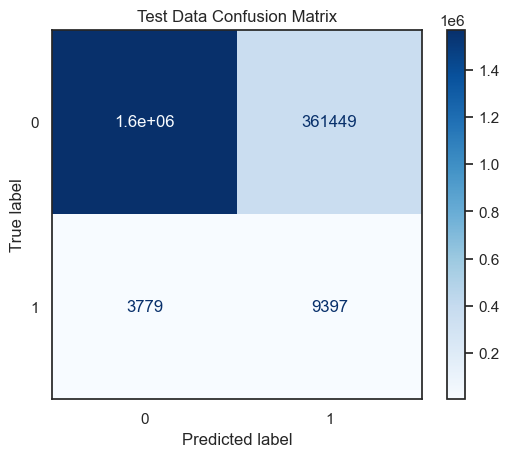

Test AUC-ROC: 0.83


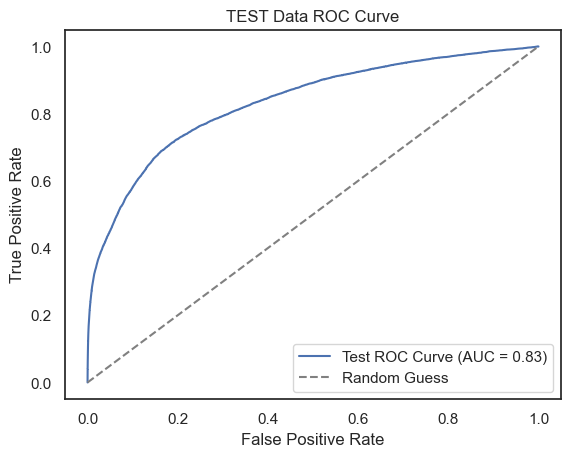

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# 테스트 데이터 불러오기
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 테스트 데이터 (Test) 평가
# -----------------------------------------------------------
# 테스트 데이터(test) 예측
test_predictions = xgb_model.predict(X_test)

# 정확도 확인
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification 리포트
print("\nClassification Report (테스트 데이터):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (혼동행렬)
print("\nConfusion Matrix (테스트 데이터):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=xgb_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC 계산
test_probabilities = xgb_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

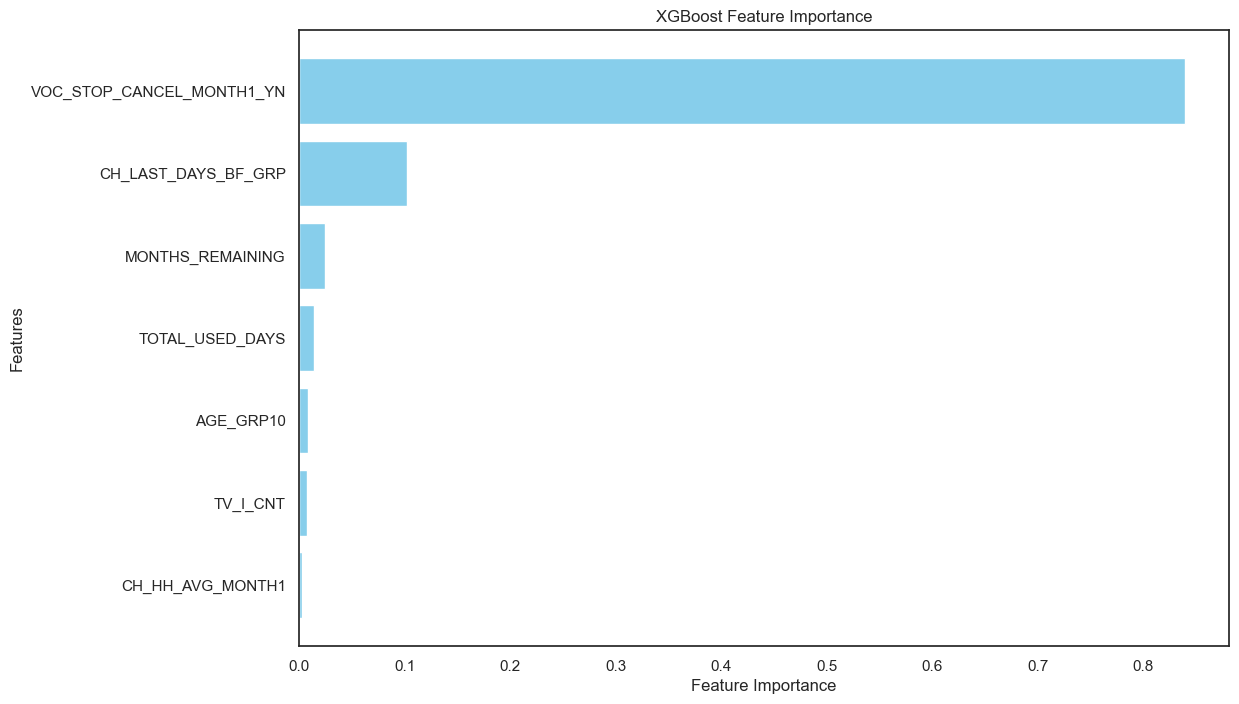

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# XGBoost Feature Importance 추출
feature_importance = xgb_model.feature_importances_

# DataFrame 변환 및 정렬
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

#### 4. LGBM 랜덤 언더 샘플링

In [34]:
from lightgbm import LGBMClassifier

# 독립 변수 & 종속 변수 설정
X_train = train.drop(columns=['churn'])  # 독립 변수
y_train = train['churn']  # 종속 변수

# LightGBM 모델 생성
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=-1,
    learning_rate=0.1,
    random_state=42 
)

# 모델 학습
lgbm_model.fit(X_train, y_train)

LGBMClassifier(random_state=42)

Test Accuracy: 0.81

Classification Report (테스트 데이터):
              precision    recall  f1-score   support

           0       1.00      0.81      0.90   1932416
           1       0.03      0.71      0.05     13176

    accuracy                           0.81   1945592
   macro avg       0.51      0.76      0.47   1945592
weighted avg       0.99      0.81      0.89   1945592


Confusion Matrix (테스트 데이터):
[[1568553  363863]
 [   3775    9401]]


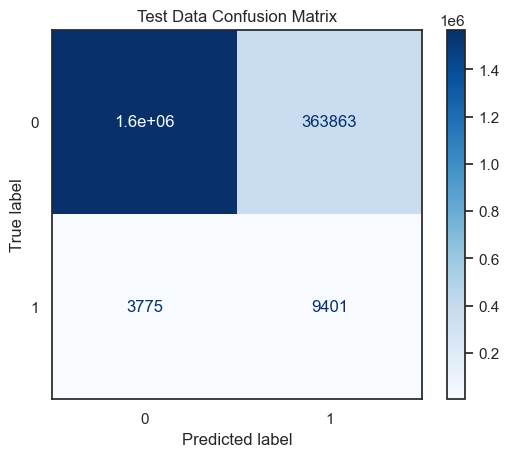

Test AUC-ROC: 0.83


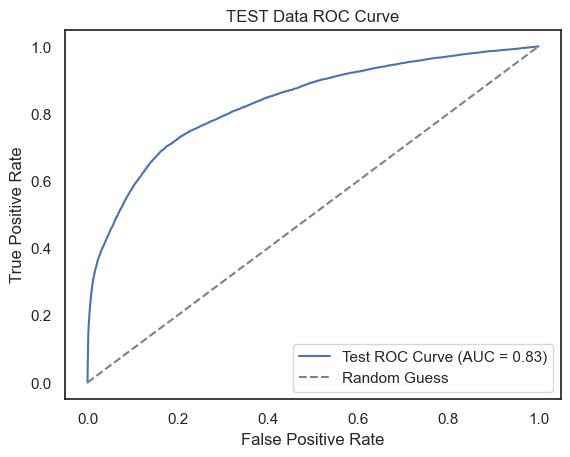

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# 테스트 데이터 불러오기
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 테스트 데이터 (Test) 평가
# -----------------------------------------------------------
# 테스트 데이터(test) 예측
test_predictions = lgbm_model.predict(X_test)

# 정확도 확인
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification 리포트
print("\nClassification Report (테스트 데이터):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (혼동행렬)
print("\nConfusion Matrix (테스트 데이터):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=lgbm_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC 계산
test_probabilities = lgbm_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

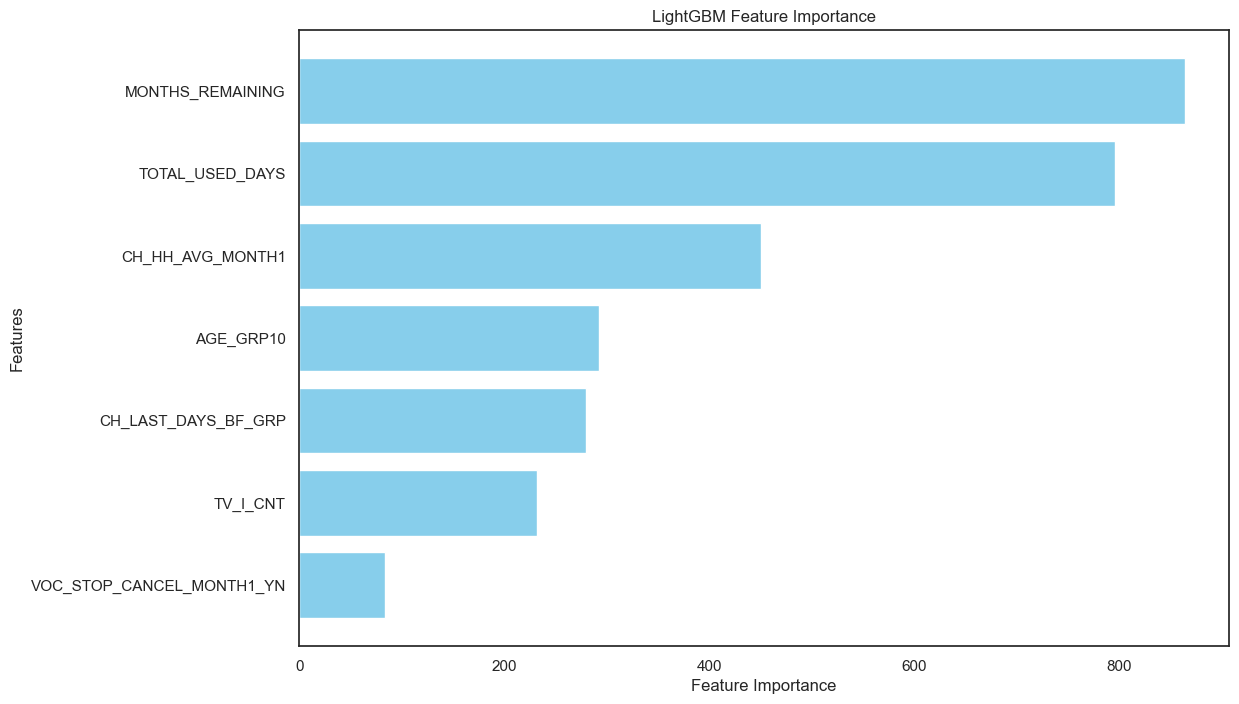

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# LightGBM Feature Importance 추출
feature_importance = lgbm_model.feature_importances_

# DataFrame 변환 및 정렬
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

#### 5. CatBoost 랜덤 언더 샘플링

In [37]:
from catboost import CatBoostClassifier

# 독립 변수 & 종속 변수 설정
X_train = train.drop(columns=['churn'])  # 독립 변수
y_train = train['churn']  # 종속 변수

# 기본값을 사용한 CatBoost 모델 생성
cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    random_seed=42
)

# 모델 학습
cat_model.fit(X_train, y_train)

0:	learn: 0.6802768	total: 177ms	remaining: 2m 56s
1:	learn: 0.6686789	total: 216ms	remaining: 1m 47s
2:	learn: 0.6578855	total: 245ms	remaining: 1m 21s
3:	learn: 0.6479896	total: 279ms	remaining: 1m 9s
4:	learn: 0.6389637	total: 315ms	remaining: 1m 2s
5:	learn: 0.6302560	total: 348ms	remaining: 57.6s
6:	learn: 0.6224575	total: 375ms	remaining: 53.2s
7:	learn: 0.6153098	total: 451ms	remaining: 55.9s
8:	learn: 0.6082890	total: 506ms	remaining: 55.7s
9:	learn: 0.6019039	total: 539ms	remaining: 53.3s
10:	learn: 0.5962934	total: 564ms	remaining: 50.7s
11:	learn: 0.5909927	total: 586ms	remaining: 48.3s
12:	learn: 0.5860282	total: 608ms	remaining: 46.2s
13:	learn: 0.5816596	total: 632ms	remaining: 44.5s
14:	learn: 0.5773859	total: 654ms	remaining: 42.9s
15:	learn: 0.5734413	total: 684ms	remaining: 42s
16:	learn: 0.5698607	total: 705ms	remaining: 40.8s
17:	learn: 0.5665054	total: 732ms	remaining: 39.9s
18:	learn: 0.5633934	total: 753ms	remaining: 38.9s
19:	learn: 0.5604848	total: 774ms	remain

Test Accuracy: 0.81

Classification Report (테스트 데이터):
              precision    recall  f1-score   support

           0       1.00      0.81      0.89   1932416
           1       0.03      0.72      0.05     13176

    accuracy                           0.81   1945592
   macro avg       0.51      0.76      0.47   1945592
weighted avg       0.99      0.81      0.89   1945592


Confusion Matrix (테스트 데이터):
[[1568051  364365]
 [   3753    9423]]


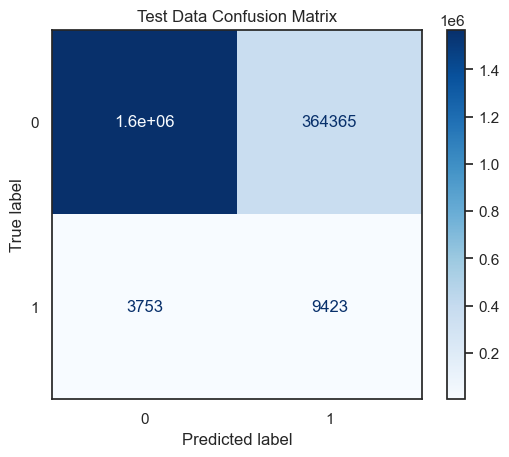

Test AUC-ROC: 0.83


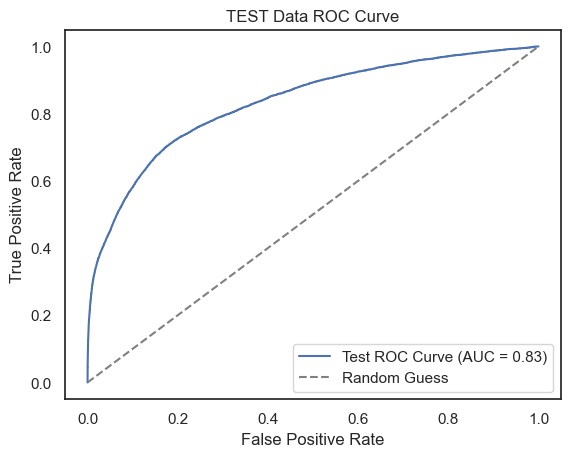

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# 테스트 데이터 불러오기
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 테스트 데이터 (Test) 평가
# -----------------------------------------------------------
# 테스트 데이터(test) 예측
test_predictions = cat_model.predict(X_test)

# 정확도 확인
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification 리포트
print("\nClassification Report (테스트 데이터):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (혼동행렬)
print("\nConfusion Matrix (테스트 데이터):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=cat_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC 계산
test_probabilities = cat_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

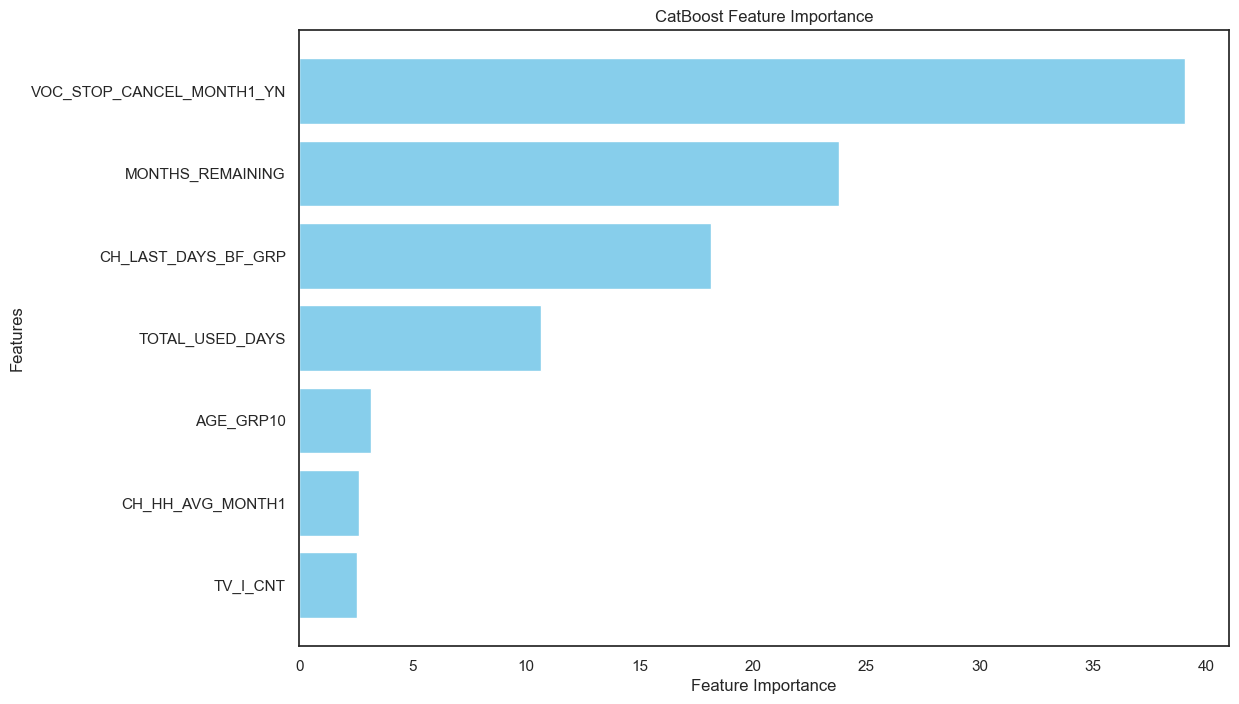

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# CatBoost Feature Importance 추출
feature_importance = cat_model.get_feature_importance()

# DataFrame 변환 및 정렬
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("CatBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()


---

### 가중치로 진행
1. 로지스틱
2. LGBM

#### 1. LR 가중치

In [40]:
df = df_real.filter(items=['sha2_hash','TOTAL_USED_DAYS','TV_I_CNT','CH_LAST_DAYS_BF_GRP',
                          'VOC_STOP_CANCEL_MONTH1_YN','AGE_GRP10',
                          'CH_HH_AVG_MONTH1','MONTHS_REMAINING','p_mt','churn'])

In [41]:
display(df)

,sha2_hash,TOTAL_USED_DAYS,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,CH_HH_AVG_MONTH1,MONTHS_REMAINING,p_mt,churn
0,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,733,3.00,3개월내없음,N,60대,0.00,13,2,N
1,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,764,3.00,일주일내,N,60대,6.72,12,3,N
2,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,794,3.00,3주일전,N,60대,9.86,11,4,N
3,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,825,3.00,4주일전,N,60대,5.95,10,5,N
4,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,855,3.00,일주일내,N,60대,4.03,9,6,N
...,...,...,...,...,...,...,...,...,...,...
21483374,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,2338,1.00,일주일내,N,50대,2.03,-40,8,N
21483375,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,2368,1.00,일주일내,N,50대,2.91,-41,9,N
21483376,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,2399,1.00,2주일전,N,50대,1.97,-42,10,N
21483377,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,2429,1.00,3개월내없음,N,50대,0.00,-43,11,N


In [42]:
train = df[df['p_mt'].isin([2,3,4,5,6,7,8,9])]
test = df[df['p_mt'] == 11]

In [43]:
train = train.drop(columns=['sha2_hash','p_mt'])
test = test.drop(columns=['sha2_hash','p_mt'])

In [44]:
from sklearn.preprocessing import LabelEncoder

train_and_test = pd.concat([train, test])

categorical_cols = train_and_test.select_dtypes(include=['object']).columns

label_encoders = {}

for col in categorical_cols:
  le = LabelEncoder()
  train_and_test[col] = le.fit_transform(train_and_test[col])
  label_encoders[col] = le

# 인코딩 후, 다시 train과 test로 분리

train = train_and_test.iloc[:len(train)].reset_index(drop=True)
test = train_and_test.iloc[len(train):].reset_index(drop=True)

print("레이블 인코딩 끝! 😁")

레이블 인코딩 끝! 😁


In [45]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# boxplot으로 확인한 robust 스케일링 컬럼들
robust_columns = ['TOTAL_USED_DAYS', 'CH_HH_AVG_MONTH1', 'MONTHS_REMAINING']  # RobustScaler를 적용할 컬럼
minmax_columns = [col for col in train.columns if col not in robust_columns + ['churn']]  # 나머지 컬럼

# 스케일러 생성
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# RobustScaler 적용
train[robust_columns] = robust_scaler.fit_transform(train[robust_columns])
test[robust_columns] = robust_scaler.transform(test[robust_columns])

# MinMaxScaler 적용
train[minmax_columns] = minmax_scaler.fit_transform(train[minmax_columns])
test[minmax_columns] = minmax_scaler.transform(test[minmax_columns])

# 결과 확인
print("robust, minmax 끝")

robust, minmax 끝


In [46]:
display(train, test)

,TOTAL_USED_DAYS,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,CH_HH_AVG_MONTH1,MONTHS_REMAINING,churn
0,-1.41,0.40,0.20,0.00,0.56,-0.65,0.08,0
1,-1.39,0.40,0.80,0.00,0.56,0.50,0.07,0
2,-1.37,0.40,0.40,0.00,0.56,1.03,0.05,0
3,-1.35,0.40,0.60,0.00,0.56,0.37,0.03,0
4,-1.33,0.40,0.80,0.00,0.56,0.04,0.02,0
...,...,...,...,...,...,...,...,...
15647031,-0.42,0.00,0.80,0.00,0.44,-0.02,-0.75,0
15647032,-0.40,0.00,0.80,0.00,0.44,-0.11,-0.77,0
15647033,-0.38,0.00,0.80,0.00,0.44,0.05,-0.78,0
15647034,-0.36,0.00,0.80,0.00,0.44,-0.30,-0.80,0


,TOTAL_USED_DAYS,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,CH_HH_AVG_MONTH1,MONTHS_REMAINING,churn
0,-1.23,0.40,0.80,0.00,0.56,0.41,0.42,0
1,1.00,0.20,0.80,0.00,0.44,1.97,-0.02,0
2,-0.16,1.00,0.80,0.00,0.56,-0.40,0.20,0
3,-0.58,0.40,0.80,0.00,0.56,-0.28,-0.30,0
4,0.72,0.60,0.80,0.00,0.44,-0.37,-0.98,0
...,...,...,...,...,...,...,...,...
1945587,0.47,0.20,0.20,0.00,0.44,-0.65,-0.93,0
1945588,-0.39,0.40,0.80,0.00,0.33,-0.34,-0.78,0
1945589,0.70,0.20,0.80,0.00,0.22,-0.36,-1.95,0
1945590,-0.87,0.20,0.80,0.00,0.44,-0.07,0.18,0


In [47]:
# 로지스틱 회귀 모델 진행

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train = train.drop(columns=['churn'])
y_train = train['churn']

# 로지스틱 회귀 모델 생성
model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# 모델 학습
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

Test Accuracy: 0.79

Classification Report (테스트 데이터):
              precision    recall  f1-score   support

           0       1.00      0.79      0.88   1932416
           1       0.02      0.65      0.04     13176

    accuracy                           0.79   1945592
   macro avg       0.51      0.72      0.46   1945592
weighted avg       0.99      0.79      0.88   1945592


Confusion Matrix (테스트 데이터):
[[1528350  404066]
 [   4581    8595]]


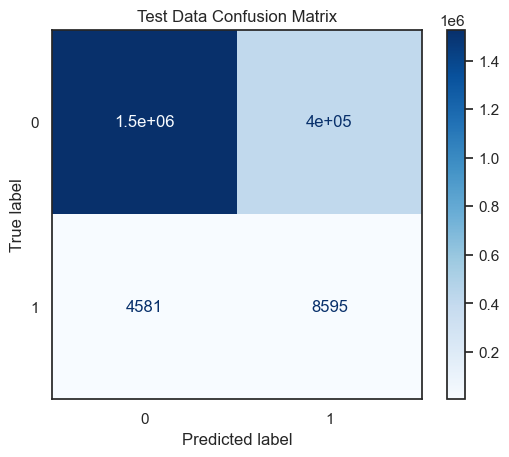

Test AUC-ROC: 0.79


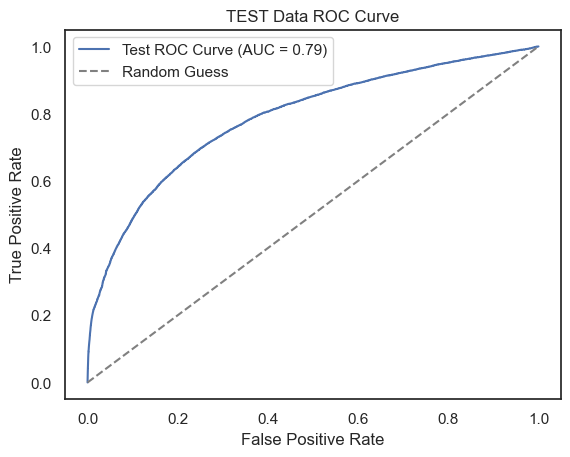

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# 테스트 데이터 불러오기
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 테스트 데이터 (Test) 평가
# -----------------------------------------------------------
# 테스트 데이터(test) 예측
test_predictions = model.predict(X_test)

# 정확도 확인
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification 리포트
print("\nClassification Report (테스트 데이터):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (혼동행렬)
print("\nConfusion Matrix (테스트 데이터):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC 계산
test_probabilities = model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

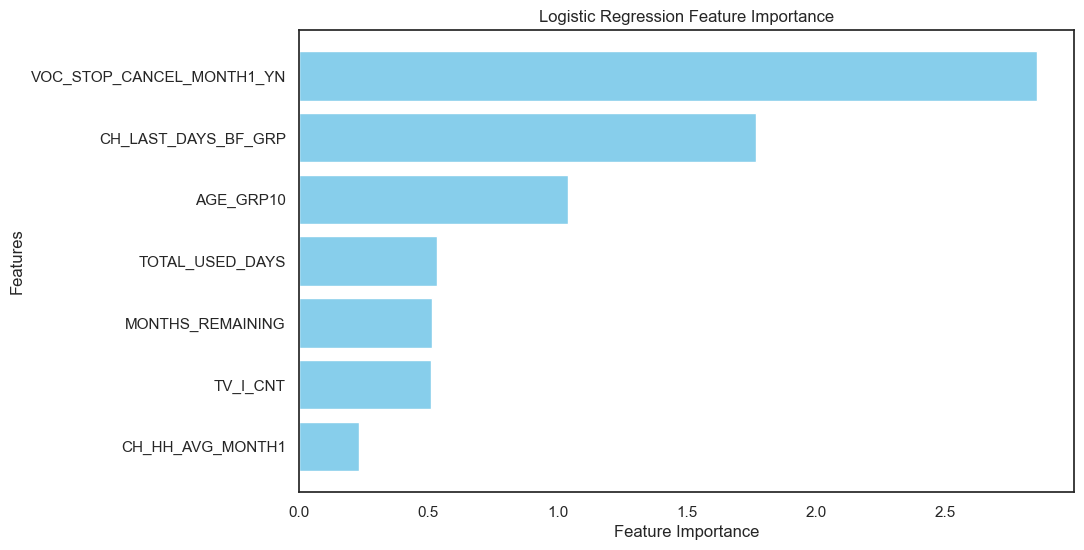

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = np.abs(model.coef_[0])

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

#### 2. LGBM 가중치

In [50]:
from lightgbm import LGBMClassifier

# 독립 변수 & 종속 변수 설정
X_train = train.drop(columns=['churn'])  # 독립 변수
y_train = train['churn']  # 종속 변수

# LightGBM 모델 생성
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=-1,
    learning_rate=0.1,
    class_weight='balanced',  # 클래스 가중치 적용
    random_state=42 
)

# 모델 학습
lgbm_model.fit(X_train, y_train)

LGBMClassifier(class_weight='balanced', random_state=42)

Test Accuracy: 0.81

Classification Report (테스트 데이터):
              precision    recall  f1-score   support

           0       1.00      0.81      0.90   1932416
           1       0.03      0.72      0.05     13176

    accuracy                           0.81   1945592
   macro avg       0.51      0.76      0.47   1945592
weighted avg       0.99      0.81      0.89   1945592


Confusion Matrix (테스트 데이터):
[[1571368  361048]
 [   3754    9422]]


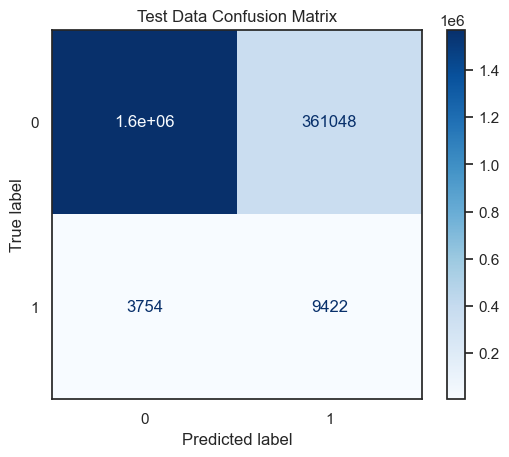

Test AUC-ROC: 0.83


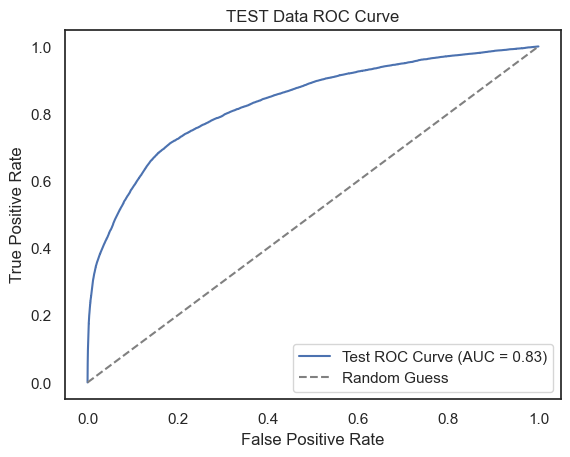

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# 테스트 데이터 불러오기
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 테스트 데이터 (Test) 평가
# -----------------------------------------------------------
# 테스트 데이터(test) 예측
test_predictions = lgbm_model.predict(X_test)

# 정확도 확인
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification 리포트
print("\nClassification Report (테스트 데이터):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (혼동행렬)
print("\nConfusion Matrix (테스트 데이터):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=lgbm_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC 계산
test_probabilities = lgbm_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

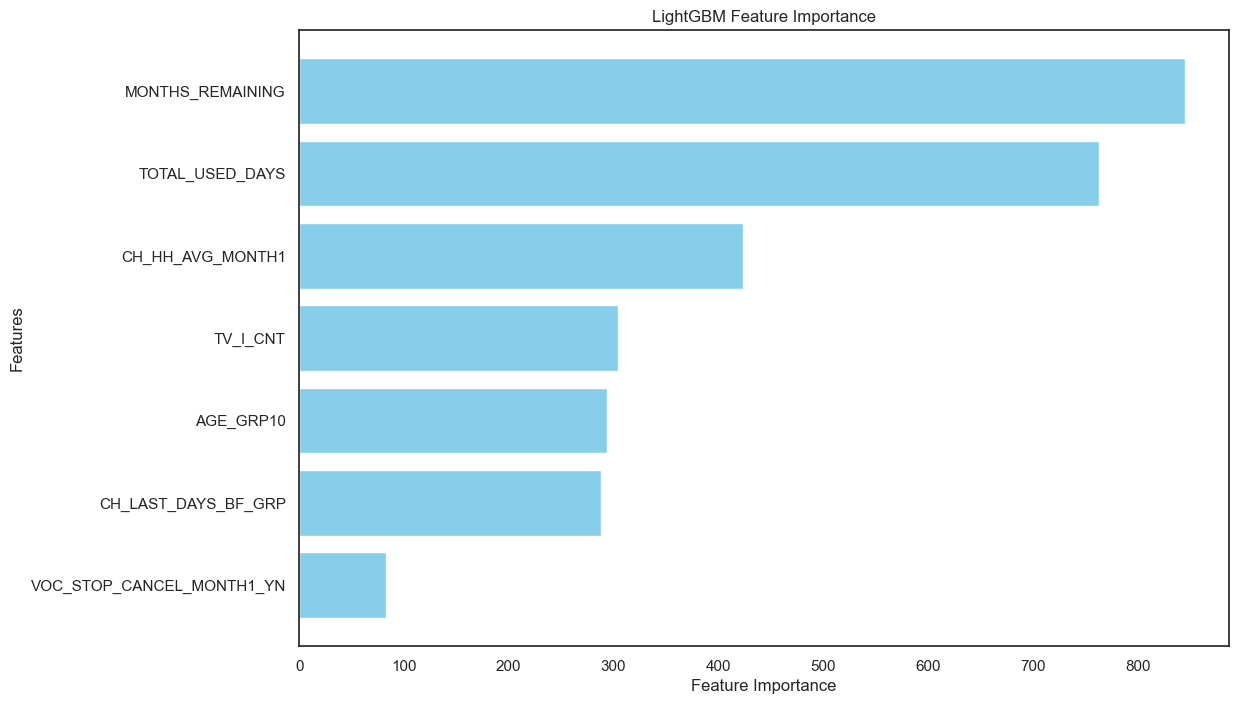

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# LightGBM Feature Importance 추출
feature_importance = lgbm_model.feature_importances_

# DataFrame 변환 및 정렬
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

01_16_LGHV_Modeling_afterFE2.ipynb 파일에서 했던 컬럼들로 모델링하는 편이 좀 더 나아보인다.